In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\CHK\\Desktop\\Final_Project\\data\\KB_Crawl_data_10000.csv')

# 1. 데이터 전처리

1) Null값 삭제

In [42]:
df['VTYPE'].unique()

array(['대형', 'SUV', '트럭', '경차', '승합', '소형', '준중형', '중형', '스포츠카', '버스',
       'RV', '특수', 0], dtype=object)

In [4]:
domestic_cars = ['기아', '현대', 'KG모빌리티', '르노코리아', '쉐보레', 'GM대우', '제네시스', '르노삼성', '대우', '쌍용', '기타', '한국GM']
foreign_cars = ['폭스바겐', '벤츠', '링컨', '지프', '미니', 'BMW', '혼다', '닷지', '아우디', '볼보',
                '사브', '포드', '닛산', '스즈키', '렉서스', '랜드로버', '기타', '미쓰비시', '쉐보레', '푸조',
                '토요타', '재규어', '캐딜락', '포르쉐', '인피니티', '마세라티', '알파로메오', '크라이슬러',
                '마쯔다', '허머', '벤틀리', '롤스로이스', '스마트', '미쯔오카', '테슬라', '마이바흐', '이베코',
                'GMC', '람보르기니', '페라리', '도요타', '애스턴마틴', '피아트', '맥라렌', 'DS', '알핀',
                '시트로엥', '모건', '뷰익', '로버', '다이하쓰', '동풍소콘', '로터스', '부가티', '미쯔비시']

In [19]:
df = pd.read_csv('C:\\Users\\CHK\\Desktop\\Final_Project\\data\\KB_Crawl_data_10000.csv')

df.replace('없음', 0, inplace=True)
df.dropna(subset=['MNAME', 'VTYPE', 'PRICE'], inplace=True)
df.fillna(0, inplace=True)

df['US_HIS'] = df['US_HIS'].str.replace('회', '').astype(float)
df['FD_HIS'] = df['FD_HIS'].str.replace('회', '').astype(float)
df.fillna(0, inplace=True)
df['MILEAGE'] = df['MILEAGE'].str.replace('km', '').str.replace(',', '')
df['PRICE'] = df['PRICE'].str.replace('만원', '').str.replace(',', '')
df['DISP'] = df['DISP'].str.replace('cc', '').str.replace(',', '')
df['TRANS'] = df['TRANS'].str.replace('cc', '').str.replace(',', '')
df['MNAME'] = df['MNAME'].str.replace('실차주', '').str.replace('직거래', '')
df['MNAME'] = df['MNAME'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['MYERAR'] = df['MYERAR'].apply(lambda x: '19' + x[:2] if int(x[:2]) > 24 else '20' + x[:2])
df['CU_HIS'] = df['CU_HIS'].replace('있음', True).replace(0, False)


# 'MANUF' 열 값 변경
df.loc[df['MNAME'].str.split().str[0].isin(foreign_cars), 'MANUF'] = '외제'
df.loc[df['MNAME'].str.split().str[0].isin(domestic_cars), 'MANUF'] = '국산'

dummy_vtype1 = pd.get_dummies(df['TRANS'], prefix='TRANS')
dummy_vtype2 = pd.get_dummies(df['F_TYPE'], prefix='F_TYPE')
# dummy_vtype3 = pd.get_dummies(df['COLOR'], prefix='COLOR')
# dummy_vtype4 = pd.get_dummies(df['MANUF'], prefix='MANUF')
# dummy_vtype2 = pd.get_dummies(df['F_TYPE'], prefix='F_TYPE')

df = pd.concat([df, dummy_vtype1], axis=1)
df = pd.concat([df, dummy_vtype2], axis=1)
# df = pd.concat([df, dummy_vtype3], axis=1)
# df = pd.concat([df, dummy_vtype4], axis=1)

# 해당 컬럼들의 데이터 타입을 int로 변환합니다.
columns_to_convert = ['MVD_HIS', 'AVD_HIS', 'FD_HIS', 'VT_HIS', 'US_HIS']
df[columns_to_convert] = df[columns_to_convert].astype(int)


df.drop(columns=['TRANS', 'F_TYPE', 'VNUM', 'LINK', 'COLOR',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], inplace=True)
df

C:\Users\CHK\AppData\Local\Temp\ipykernel_16248\3272893145.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CU_HIS'] = df['CU_HIS'].replace('있음', True).replace(0, False)


,SEQ,MNAME,PRICE,MYERAR,MILEAGE,DISP,VTYPE,CU_HIS,MVD_HIS,AVD_HIS,...,F_TYPE_LPG,F_TYPE_가솔린,F_TYPE_가솔린+LPG,F_TYPE_기타,F_TYPE_디젤,F_TYPE_전기,F_TYPE_하이브리드,F_TYPE_하이브리드(LPG),F_TYPE_하이브리드(가솔린),F_TYPE_하이브리드(디젤)
0,1,기아 오피러스 프리미엄 GH270 스페셜 럭셔리,580,2009,94800,2700,대형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
1,2,링컨 뉴 MKX 2.7 리저브,2250,2017,68000,2694,SUV,False,0,0,...,False,True,False,False,False,False,False,False,False,False
2,3,현대 제네시스 BH380 ROYAL VIP팩,730,2008,179000,3778,대형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
3,4,현대 제네시스 BH330 LUXURY 기본형,850,2011,178000,3342,대형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
4,5,현대 포터2 카고,650,2016,188051,0,트럭,False,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,미니 쿠퍼 S 2.0 기본형,1640,2019,99432,1998,소형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
9996,9997,미니 뉴 컨트리맨 (F60) 2.0 Cooper JCW All4 기본형,2370,2019,69544,1998,소형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
9997,9998,한국GM 쉐보레 볼트 1.5,1390,2018,131512,1490,소형,False,0,0,...,False,False,False,False,False,False,False,False,True,False
9998,9999,기아 쏘울 1.6 스마트 기본형,560,2010,113517,1591,준중형,False,0,0,...,False,True,False,False,False,False,False,False,False,False


In [21]:
df2 = df[df['MANUF'] == '국산']

In [22]:
df2

,SEQ,MNAME,PRICE,MYERAR,MILEAGE,DISP,VTYPE,CU_HIS,MVD_HIS,AVD_HIS,...,F_TYPE_LPG,F_TYPE_가솔린,F_TYPE_가솔린+LPG,F_TYPE_기타,F_TYPE_디젤,F_TYPE_전기,F_TYPE_하이브리드,F_TYPE_하이브리드(LPG),F_TYPE_하이브리드(가솔린),F_TYPE_하이브리드(디젤)
0,1,기아 오피러스 프리미엄 GH270 스페셜 럭셔리,580,2009,94800,2700,대형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
2,3,현대 제네시스 BH380 ROYAL VIP팩,730,2008,179000,3778,대형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
3,4,현대 제네시스 BH330 LUXURY 기본형,850,2011,178000,3342,대형,False,0,0,...,False,True,False,False,False,False,False,False,False,False
4,5,현대 포터2 카고,650,2016,188051,0,트럭,False,0,0,...,False,False,False,False,True,False,False,False,False,False
5,6,한국GM 쉐보레 스파크 밴 2인승 밴,230,2015,164960,995,경차,False,0,0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,기아 디 올 뉴 스포티지 D2.0 2WD 트렌디,2390,2021,72162,0,SUV,True,0,0,...,False,False,False,False,True,False,False,False,False,False
9994,9995,현대 아반떼AD 1.6 GDi Value Plus,1190,2018,82286,0,준중형,True,0,0,...,False,True,False,False,False,False,False,False,False,False
9997,9998,한국GM 쉐보레 볼트 1.5,1390,2018,131512,1490,소형,False,0,0,...,False,False,False,False,False,False,False,False,True,False
9998,9999,기아 쏘울 1.6 스마트 기본형,560,2010,113517,1591,준중형,False,0,0,...,False,True,False,False,False,False,False,False,False,False


In [23]:
df2.to_csv('pre-processed data.csv')

2. VTYPE별로 df 분할

In [24]:
processed_df = pd.read_csv('pre-processed data.csv')
processed_df.drop(columns='Unnamed: 0', inplace=True)
processed_df.columns

Index(['SEQ', 'MNAME', 'PRICE', 'MYERAR', 'MILEAGE', 'DISP', 'VTYPE', 'CU_HIS',
       'MVD_HIS', 'AVD_HIS', 'FD_HIS', 'VT_HIS', 'US_HIS', 'MANUF',
       'TRANS_CVT', 'TRANS_SAT', 'TRANS_기타', 'TRANS_수동', 'TRANS_오토',
       'F_TYPE_0', 'F_TYPE_CNG', 'F_TYPE_LPG', 'F_TYPE_가솔린', 'F_TYPE_가솔린+LPG',
       'F_TYPE_기타', 'F_TYPE_디젤', 'F_TYPE_전기', 'F_TYPE_하이브리드',
       'F_TYPE_하이브리드(LPG)', 'F_TYPE_하이브리드(가솔린)', 'F_TYPE_하이브리드(디젤)'],
      dtype='object')

In [25]:
for vtype in processed_df['VTYPE'].unique():
    globals()[vtype] = processed_df[processed_df['VTYPE'] == vtype]

In [26]:
df['VTYPE'].unique()

array(['대형', 'SUV', '트럭', '경차', '승합', '소형', '준중형', '중형', '스포츠카', '버스',
       'RV', '특수'], dtype=object)

In [27]:
len_dic = {'대형': len(대형), 'SUV': len(SUV), '트럭': len(트럭), '경차': len(경차), '승합': len(승합), 
           '소형': len(소형), '준중형': len(준중형), '중형': len(중형), '스포츠카': len(스포츠카), '버스': len(버스),
           'RV': len(RV), '특수': len(특수)}
len_dic

{'대형': 1632,
 'SUV': 2125,
 '트럭': 936,
 '경차': 541,
 '승합': 350,
 '소형': 112,
 '준중형': 563,
 '중형': 1084,
 '스포츠카': 9,
 '버스': 10,
 'RV': 575,
 '특수': 6}

In [216]:
processed_df.columns

Index(['SEQ', 'MNAME', 'PRICE', 'MYERAR', 'MILEAGE', 'DISP', 'VTYPE', 'CU_HIS',
       'MVD_HIS', 'AVD_HIS',
       ...
       'COLOR_하늘색', 'COLOR_허니비', 'COLOR_화이트펄', 'COLOR_회색', 'COLOR_회색투톤',
       'COLOR_흰색', 'COLOR_흰색(노랑색 도색)', 'COLOR_흰색투톤', 'MANUF_국산', 'MANUF_외제'],
      dtype='object', length=162)

In [43]:
대형.to_csv('원데이터.csv')

3) 모델링

In [41]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 특성(feature)과 타겟 변수(target)로 데이터를 나눕니다.
X = 대형.drop(columns=['SEQ', 'PRICE', 'MNAME', 'VTYPE', 'MANUF'])
y = 대형['PRICE']

# 훈련 세트와 테스트 세트로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.dtypes
X_train.to_csv('train')

In [34]:
# XGBoost 회귀 모델을 생성합니다.
model = XGBRegressor()

# 모델을 훈련합니다.
model.fit(X_train, y_train)

# 테스트 세트로 모델을 평가합니다.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 테스트 데이터셋에 대한 예측 수행
y_pred = model.predict(X_test)

# 실제값과 예측값 동시 출력
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


Mean Squared Error: 281616.8502126604
      Actual    Predicted
3335     959  1025.007812
7920     340   344.994385
2638    1190  1185.249146
2480    1360  1344.745728
4412    1950  1938.000000
...      ...          ...
6325     420   207.451645
1556    1300  1239.663086
917     1750  1493.016235
1564    1080  1245.469482
4687     550   555.993530

[327 rows x 2 columns]


In [35]:
# 테스트 데이터셋에 대한 예측 수행
y_pred = model.predict(X_test)

# 실제값과 예측값 동시 출력
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


      Actual    Predicted
3335     959  1025.007812
7920     340   344.994385
2638    1190  1185.249146
2480    1360  1344.745728
4412    1950  1938.000000
...      ...          ...
6325     420   207.451645
1556    1300  1239.663086
917     1750  1493.016235
1564    1080  1245.469482
4687     550   555.993530

[327 rows x 2 columns]


In [235]:
import pandas as pd

data = {
    'MYERAR': [2009],
    'MILEAGE': [140000000],
    'DISP': [2700],
    'CU_HIS': [False],
    'MVD_HIS': [16000000],
    'AVD_HIS': [0],
    'FD_HIS': [0],
    'VT_HIS': [0],
    'US_HIS': [9],
    'TRANS_CVT': [False],
    'TRANS_SAT': [False],
    'TRANS_기타': [False],
    'TRANS_수동': [False],
    'TRANS_오토': [True],
    'F_TYPE_0': [False],
    'F_TYPE_CNG': [False],
    'F_TYPE_LPG': [False],
    'F_TYPE_가솔린': [True],
    'F_TYPE_가솔린+LPG': [False],
    'F_TYPE_기타': [False],
    'F_TYPE_디젤': [False],
    'F_TYPE_전기': [False],
    'F_TYPE_하이브리드': [False],
    'F_TYPE_하이브리드(LPG)': [False],
    'F_TYPE_하이브리드(가솔린)': [False],
    'F_TYPE_하이브리드(디젤)': [False]
}

df_similar = pd.DataFrame(data)
print(df_similar)


   MYERAR       MILEAGE  DISP  CU_HIS   MVD_HIS  AVD_HIS  FD_HIS  VT_HIS  \
0    2009  140000000000  2700   False  16000000        0       0       0   

   US_HIS  TRANS_CVT  ...  COLOR_하늘색  COLOR_허니비  COLOR_화이트펄  COLOR_회색  \
0       9      False  ...      False      False       False     False   

   COLOR_회색투톤  COLOR_흰색  COLOR_흰색(노랑색 도색)  COLOR_흰색투톤  MANUF_국산  MANUF_외제  
0       False     False             False       False     False      True  

[1 rows x 158 columns]


In [236]:
y_pred_new = model.predict(df_similar)

# 예측값 출력
print("새로운 데이터에 대한 예측값:", y_pred_new)

새로운 데이터에 대한 예측값: [682.01544]


c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from cur

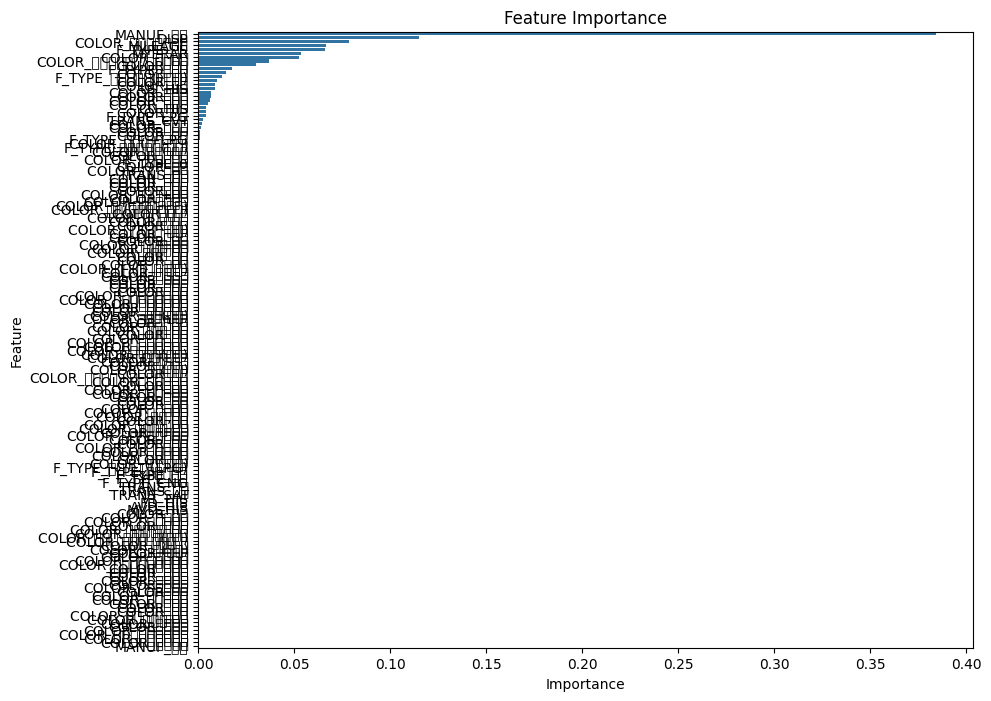

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도를 추출합니다.
feature_importance = model.feature_importances_

# 주어진 데이터를 기반으로 columns_to_use 변수 만들기
columns_to_use = [
    'MYERAR', 'MILEAGE', 'DISP', 'CU_HIS', 'MVD_HIS', 'AVD_HIS', 'FD_HIS', 'VT_HIS', 'US_HIS',
    'TRANS_CVT', 'TRANS_SAT', 'TRANS_기타', 'TRANS_수동', 'TRANS_오토',
    'F_TYPE_0', 'F_TYPE_CNG', 'F_TYPE_LPG', 'F_TYPE_가솔린', 'F_TYPE_가솔린+LPG', 'F_TYPE_기타', 'F_TYPE_디젤',
    'F_TYPE_전기', 'F_TYPE_하이브리드', 'F_TYPE_하이브리드(LPG)', 'F_TYPE_하이브리드(가솔린)', 'F_TYPE_하이브리드(디젤)',
    'COLOR_(댄디블루)', 'COLOR_갈대색', 'COLOR_갈색', 'COLOR_갈투', 'COLOR_건그레이', 'COLOR_검정', 'COLOR_검정색',
    'COLOR_검정색투톤', 'COLOR_골드코스트실버', 'COLOR_군청', 'COLOR_군청색', 'COLOR_그라파이트그레이', 'COLOR_그랑블루',
    'COLOR_그래비티 블루', 'COLOR_그래비티블루', 'COLOR_글로윙실버', 'COLOR_남색', 'COLOR_남색,곤색', 'COLOR_네이비그레이',
    'COLOR_네이비색', 'COLOR_노란', 'COLOR_노랑', 'COLOR_노랑색', 'COLOR_녹색', 'COLOR_다크그레이', 'COLOR_다크블루',
    'COLOR_레인포레스트', 'COLOR_로얄블루', 'COLOR_마그네틱포스', 'COLOR_마그네틱포스그레이', 'COLOR_맨하탄그레이', 'COLOR_메탈색',
    'COLOR_모던블랙', 'COLOR_모하비 실버', 'COLOR_무광 다크그레이', 'COLOR_미색', 'COLOR_민트', 'COLOR_민트색',
    'COLOR_밀크베이지', 'COLOR_밀키베이지', 'COLOR_밤색', 'COLOR_백진주', 'COLOR_베이지', 'COLOR_베이지색', 'COLOR_보라색',
    'COLOR_분홍색', 'COLOR_브라운', 'COLOR_브론즈', 'COLOR_브리티시레이싱그린', 'COLOR_블랙사파이어/모카브라운',
    'COLOR_블루릿지마운틴', 'COLOR_블루스톤', 'COLOR_빨간색', 'COLOR_빨강', 'COLOR_빨강(주홍)', 'COLOR_빨강색',
    'COLOR_세틴메탈', 'COLOR_소피스토그레이', 'COLOR_스노우 화이트 펄', 'COLOR_스노우 화이트 펄(흰색)', 'COLOR_스노우화이트펄',
    'COLOR_스타라이트 블루', 'COLOR_스토미씨색상', 'COLOR_스페이스블루', 'COLOR_시티스케이프그린', 'COLOR_썬더그레이',
    'COLOR_연금색', 'COLOR_연두색', 'COLOR_오로라블랙펄', 'COLOR_오션뷰+투톤', 'COLOR_와인색', 'COLOR_우유니화이트',
    'COLOR_은색', 'COLOR_은회색', 'COLOR_이리듐 실버', 'COLOR_이리듐실버', 'COLOR_인기색상', 'COLOR_임페리얼 블루',
    'COLOR_자주', 'COLOR_자주색', 'COLOR_주황', 'COLOR_주황색', 'COLOR_쥐 색', 'COLOR_쥐색', 'COLOR_쥐색(칵투스 그레이)',
    'COLOR_쥐색(코리스그레이)', 'COLOR_쥐샋', 'COLOR_진주', 'COLOR_진주색', 'COLOR_진청', 'COLOR_진청색', 'COLOR_청색',
    'COLOR_청색(로얄 블루)', 'COLOR_청옥', 'COLOR_청옥색', 'COLOR_체리블랙+그래비티그레이', 'COLOR_초록', 'COLOR_초록(연두)',
    'COLOR_초록색', 'COLOR_카본블랙', 'COLOR_크레용 랩핑', 'COLOR_크레용(래핑)', 'COLOR_크리스탈화이트펄', 'COLOR_클리어화이트',
    'COLOR_태즈먼 블루', 'COLOR_테즈먼블루', 'COLOR_투톤', 'COLOR_티타늄 실버', 'COLOR_티타늄실버', 'COLOR_팁블루n골드',
    'COLOR_파랑', 'COLOR_파랑(남색,곤색)', 'COLOR_파랑(흰색)', 'COLOR_파랑색', 'COLOR_파인 티타늄', 'COLOR_판테라메탈',
    'COLOR_폴라화이트', 'COLOR_폴리시드메탈', 'COLOR_플라티늄그라파이트', 'COLOR_플래티넘그레이', 'COLOR_핑크', 'COLOR_핑크색',
    'COLOR_하늘색', 'COLOR_허니비', 'COLOR_화이트펄', 'COLOR_회색', 'COLOR_회색투톤', 'COLOR_흰색', 'COLOR_흰색(노랑색 도색)',
    'COLOR_흰색투톤', 'MANUF_국산', 'MANUF_외제'
]


# 특성 중요도를 데이터프레임으로 변환합니다.
feature_importance_df = pd.DataFrame({
    'Feature': columns_to_use,
    'Importance': feature_importance
})

# 중요도에 따라 내림차순으로 정렬합니다.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도를 시각화합니다.
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [240]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 특성(feature)과 타겟 변수(target)로 데이터를 나눕니다.
X = SUV.drop(columns=['SEQ', 'PRICE', 'MNAME', 'VTYPE'])
y = SUV['PRICE']

# 훈련 세트와 테스트 세트로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 회귀 모델을 생성합니다.
model = XGBRegressor()

# 모델을 훈련합니다.
model.fit(X_train, y_train)

# 테스트 세트로 모델을 평가합니다.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 테스트 데이터셋에 대한 예측 수행
y_pred = model.predict(X_test)

# 실제값과 예측값 동시 출력
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


Mean Squared Error: 419961.0884469298
      Actual    Predicted
2331    1650  1755.712158
1437    1390  1336.902710
8729    1730  1708.743896
2449     980   896.904236
6341    1699  1590.755493
...      ...          ...
1253    3900  5173.306641
6819    1050  1200.956055
3276    1230  1397.670044
7475    1950  2036.889160
8657    1880  1911.880859

[544 rows x 2 columns]


c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\CHK\Desktop\Final_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from curr

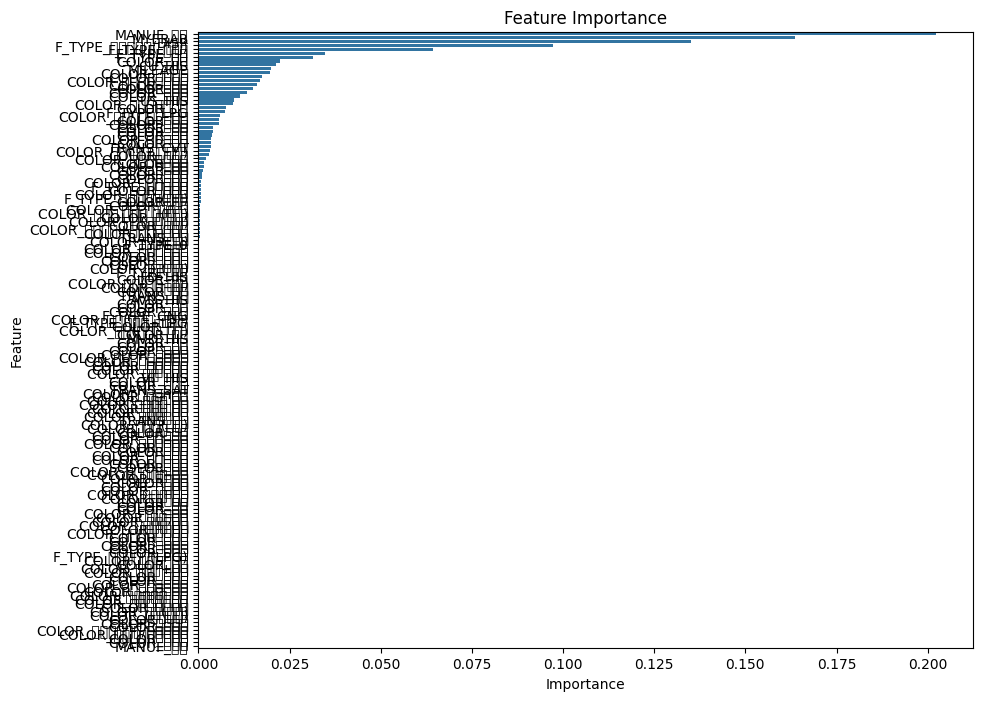

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도를 추출합니다.
feature_importance = model.feature_importances_

# 주어진 데이터를 기반으로 columns_to_use 변수 만들기
columns_to_use = [
    'MYERAR', 'MILEAGE', 'DISP', 'CU_HIS', 'MVD_HIS', 'AVD_HIS', 'FD_HIS', 'VT_HIS', 'US_HIS',
    'TRANS_CVT', 'TRANS_SAT', 'TRANS_기타', 'TRANS_수동', 'TRANS_오토',
    'F_TYPE_0', 'F_TYPE_CNG', 'F_TYPE_LPG', 'F_TYPE_가솔린', 'F_TYPE_가솔린+LPG', 'F_TYPE_기타', 'F_TYPE_디젤',
    'F_TYPE_전기', 'F_TYPE_하이브리드', 'F_TYPE_하이브리드(LPG)', 'F_TYPE_하이브리드(가솔린)', 'F_TYPE_하이브리드(디젤)',
    'COLOR_(댄디블루)', 'COLOR_갈대색', 'COLOR_갈색', 'COLOR_갈투', 'COLOR_건그레이', 'COLOR_검정', 'COLOR_검정색',
    'COLOR_검정색투톤', 'COLOR_골드코스트실버', 'COLOR_군청', 'COLOR_군청색', 'COLOR_그라파이트그레이', 'COLOR_그랑블루',
    'COLOR_그래비티 블루', 'COLOR_그래비티블루', 'COLOR_글로윙실버', 'COLOR_남색', 'COLOR_남색,곤색', 'COLOR_네이비그레이',
    'COLOR_네이비색', 'COLOR_노란', 'COLOR_노랑', 'COLOR_노랑색', 'COLOR_녹색', 'COLOR_다크그레이', 'COLOR_다크블루',
    'COLOR_레인포레스트', 'COLOR_로얄블루', 'COLOR_마그네틱포스', 'COLOR_마그네틱포스그레이', 'COLOR_맨하탄그레이', 'COLOR_메탈색',
    'COLOR_모던블랙', 'COLOR_모하비 실버', 'COLOR_무광 다크그레이', 'COLOR_미색', 'COLOR_민트', 'COLOR_민트색',
    'COLOR_밀크베이지', 'COLOR_밀키베이지', 'COLOR_밤색', 'COLOR_백진주', 'COLOR_베이지', 'COLOR_베이지색', 'COLOR_보라색',
    'COLOR_분홍색', 'COLOR_브라운', 'COLOR_브론즈', 'COLOR_브리티시레이싱그린', 'COLOR_블랙사파이어/모카브라운',
    'COLOR_블루릿지마운틴', 'COLOR_블루스톤', 'COLOR_빨간색', 'COLOR_빨강', 'COLOR_빨강(주홍)', 'COLOR_빨강색',
    'COLOR_세틴메탈', 'COLOR_소피스토그레이', 'COLOR_스노우 화이트 펄', 'COLOR_스노우 화이트 펄(흰색)', 'COLOR_스노우화이트펄',
    'COLOR_스타라이트 블루', 'COLOR_스토미씨색상', 'COLOR_스페이스블루', 'COLOR_시티스케이프그린', 'COLOR_썬더그레이',
    'COLOR_연금색', 'COLOR_연두색', 'COLOR_오로라블랙펄', 'COLOR_오션뷰+투톤', 'COLOR_와인색', 'COLOR_우유니화이트',
    'COLOR_은색', 'COLOR_은회색', 'COLOR_이리듐 실버', 'COLOR_이리듐실버', 'COLOR_인기색상', 'COLOR_임페리얼 블루',
    'COLOR_자주', 'COLOR_자주색', 'COLOR_주황', 'COLOR_주황색', 'COLOR_쥐 색', 'COLOR_쥐색', 'COLOR_쥐색(칵투스 그레이)',
    'COLOR_쥐색(코리스그레이)', 'COLOR_쥐샋', 'COLOR_진주', 'COLOR_진주색', 'COLOR_진청', 'COLOR_진청색', 'COLOR_청색',
    'COLOR_청색(로얄 블루)', 'COLOR_청옥', 'COLOR_청옥색', 'COLOR_체리블랙+그래비티그레이', 'COLOR_초록', 'COLOR_초록(연두)',
    'COLOR_초록색', 'COLOR_카본블랙', 'COLOR_크레용 랩핑', 'COLOR_크레용(래핑)', 'COLOR_크리스탈화이트펄', 'COLOR_클리어화이트',
    'COLOR_태즈먼 블루', 'COLOR_테즈먼블루', 'COLOR_투톤', 'COLOR_티타늄 실버', 'COLOR_티타늄실버', 'COLOR_팁블루n골드',
    'COLOR_파랑', 'COLOR_파랑(남색,곤색)', 'COLOR_파랑(흰색)', 'COLOR_파랑색', 'COLOR_파인 티타늄', 'COLOR_판테라메탈',
    'COLOR_폴라화이트', 'COLOR_폴리시드메탈', 'COLOR_플라티늄그라파이트', 'COLOR_플래티넘그레이', 'COLOR_핑크', 'COLOR_핑크색',
    'COLOR_하늘색', 'COLOR_허니비', 'COLOR_화이트펄', 'COLOR_회색', 'COLOR_회색투톤', 'COLOR_흰색', 'COLOR_흰색(노랑색 도색)',
    'COLOR_흰색투톤', 'MANUF_국산', 'MANUF_외제'
]


# 특성 중요도를 데이터프레임으로 변환합니다.
feature_importance_df = pd.DataFrame({
    'Feature': columns_to_use,
    'Importance': feature_importance
})

# 중요도에 따라 내림차순으로 정렬합니다.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도를 시각화합니다.
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
